<a href="https://colab.research.google.com/github/wordman2/GINN/blob/main/Abschnitt_2_Aufgaben.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import numpy as np




#GINN Teil 2

## 2.1 Gradientenabstieg 1d

*   $J_s\left( {\theta } \right)$: Mittlerer Verlust auf der Stichprobe
*   $J'\left( {\theta } \right)$: Steigung der Verlustfunktion bei konkreten Modellparametern
*   $\theta \left( t \right): = \theta \left( {t - 1} \right) - \lambda  \cdot J'\left({\theta \left( {t - 1} \right)} \right)$: Neubestimmung der Modellparameterauf Basis der Steigung der Verlustfunktion mit Lernrate

Annahme hier: nur ein Modellparameter (1d)



### Aufgaben



*   Gegeben ist die Funktion $L_a\left( \theta \right) = \theta^4  - \theta^3  - \theta^2$
    *   Experimentieren Sie mit unterschiedlichen Startwerten und Lernraten und beobachten Sie das Verhalten des Gradientenabstiegs.
    *   Zeichnen Sie verschiedene konkrete Lernkurven (= L(\theta) in Abhängigkeit von t) programmatisch oder mit Stift und Papier. Wie äußern sich zu große bzw. zu kleine Lernraten in der Lernkurve?

*   Gegeben ist die Funktion $L_b\left( \theta \right) = \left\{ {\begin{array}{*{20}c}
   {\begin{array}{*{20}c}
   {2 \cdot \theta^2  + \frac{3}{{16}}} & {\theta \le 0}  \\
\end{array}}  \\
   {\begin{array}{*{20}c}
   {\frac{\theta}{2} + \frac{3}{{16}}} & {\theta > 0}  \\
\end{array}}  \\
\end{array}} \right.$ Berechnen Sie mit Stift und Papier:
    * Bei Startwert $\theta=-1$ und Lernrate $\lambda=0.1$, was sind die nächsten beiden Schritte des Gradientenabstiegs?
    * Bei Startwert $\theta=4$ und unbekannter Lernrate benötigt der Gradientenabstieg 12 Schritte, bis $L_b\left(\theta \right) = 0$ erreicht wird. Bestimme die Lernrate.









#### Codedefinitionen

In [ ]:

# Definition der Funktion und ihrer Ableitung
def f(x):
    return x**4 - x**3 - x**2

def df(x):
    return 4*x**3 - 3*x**2 - 2*x

# Implementierung des Gradientenabstiegs mit visueller Darstellung der Steigung
def gradient_descent(start_x, learning_rate, n_iterations=20):
    x = start_x
    x_history = [x]
    for _ in range(n_iterations):
        grad = df(x)
        x = x - learning_rate * grad
        x_history.append(x)
    return x_history

# Interaktive Visualisierung mit Darstellung der Steigung
def plot_gradient_descent(start_x, learning_rate):
    x_history = gradient_descent(start_x, learning_rate)
    x_values = np.linspace(-1.5, 1.5, 400)
    y_values = f(x_values)

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='f(x)')
    plt.scatter(x_history, [f(x) for x in x_history], color='red')

    # Zeichnen der Tangentenlinien und Pfeile
    for i in range(len(x_history)-1):
        x_cur = x_history[i]
        y_cur = f(x_cur)
        slope = df(x_cur)

        # Tangentenlinie für eine kleine Änderung in x
        x_tangent = np.array([x_cur - 0.1, x_cur + 0.1])
        y_tangent = slope * (x_tangent - x_cur) + y_cur
        plt.plot(x_tangent, y_tangent, color='orange', linestyle='--')

        # Pfeil, der den nächsten Schritt zeigt
        plt.arrow(x_cur, y_cur, -learning_rate * slope, 0, head_width=0.05, head_length=0.02, fc='blue', ec='blue')

    plt.title('Gradient Descent Optimization with Slope Visualization')
    plt.xlabel('theta')
    plt.ylabel('f(theta)')
    plt.legend()
    plt.grid(True)
    plt.show()


## Lernkurve

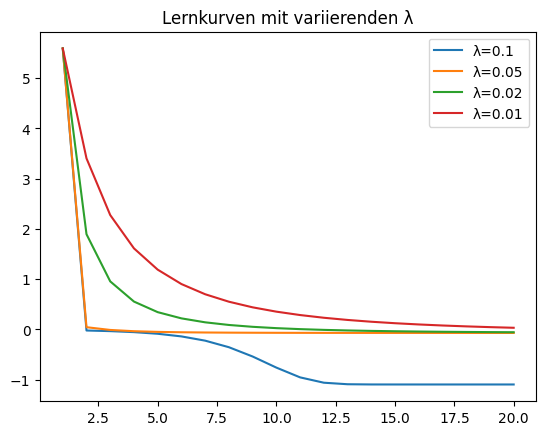

In [ ]:
n_t = 20
x = np.random.uniform(-1.5, 1.5)
learning_rates = [0.1, 0.05, 0.02, 0.01]
t = list(range(1,n_t+1))

for lmbd in learning_rates:
  x_vals = gradient_descent(x, lmbd, n_t-1)
  y_hat_vals = [f(x) for x in x_vals]

  plt.plot(t, y_hat_vals, label=f"λ={lmbd}")

plt.title(f"Lernkurven mit variierenden λ")
plt.legend()

#### Visualisierung $L_a\left( \theta \right)$

In [ ]:

# r Slider für die Lernrate und den Startwert
interact(plot_gradient_descent,
         start_x=FloatSlider(value=-0.5, min=-1.5, max=1.5, step=0.1),
         learning_rate=FloatSlider(value=0.01, min=0.01, max=0.2, step=0.01))

interactive(children=(FloatSlider(value=-0.5, description='start_x', max=1.5, min=-1.5), FloatSlider(value=0.0…

<function __main__.plot_gradient_descent(start_x, learning_rate)>

#### Visualisierung $L_b\left( \theta \right)$

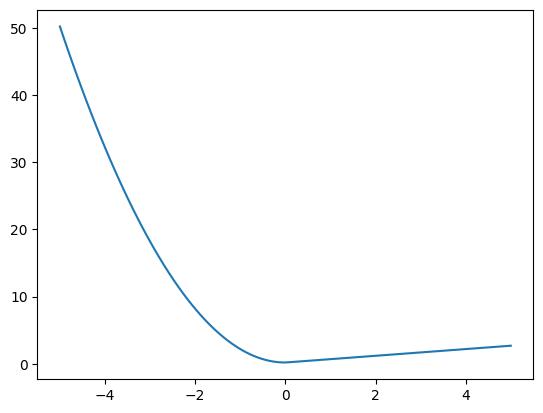

In [ ]:
# Display the plot for stepwise function
# Define the range of x values
x_values = np.linspace(-5, 5, 100)

# Calculate y values based on the function f(x) = x^2 + x
y_values = [2*x**2 +3/16 if x<=0 else x/2+3/16 for x in x_values]

plt.plot(x_values, y_values)

## 2.2 und 2.3 Gradientenabstieg Mehrdimensional, Jacobian
*  $\frac{{\partial J\left( \Theta  \right)}}{{\partial \Theta _j }}$: Partielle Ableitung der Verlustfunktion
*  $\frac{{\partial J\left( \Theta  \right)}}{{\partial \Theta }} = \left[ {\frac{{\partial J\left( \Theta  \right)}}{{\partial \Theta _1 }}, \ldots ,\frac{{\partial J\left( \Theta  \right)}}{{\partial \Theta _d }}} \right] \in \mathbb{R}^{1 \times d}$: Alle partiellen Ableitungen für die Modellparameter (Jacobi-Matrix)


###Aufgaben


*   Nutzen Sie die interaktive 3d Visualisierung, um das Beispiel in Video 2-3 besser nachzuvollziehen. Können Sie z.B. individuelle Niveaulinien wiederfinden?  
*   Finden und/oder designen Sie Funktionen definiert auf $\mathbb{R}^2$, bei denen der Gradientenabstieg lange dauert.
*   Erstellen Sie sich eine eigene Übungsaufgabe für eine Funktion auf $\mathbb{R}^2$ und berechnen sie drei Schritte des Gradientenabstiegs mit Stift und Papier. Prüfen Sie Ihre Lösung ggf. programmatisch und tauschen Sie die Aufgabenstellung mit einem Lernpartner.
*   Bestimmen Sie die Jacobi-Matrizen für die beiden Funktionen
$
\begin{array}{l}
 F\left( {a,b} \right) = \left[ {\begin{array}{*{20}c}
   {a^2  + \sin \left( a \right)}  \\
   {a \cdot \left( {b - 2} \right)}  \\
   {b^2  - 3 \cdot a \cdot b}  \\
\end{array}} \right] \\
 G\left( {a,b,c} \right) = \left[ {\begin{array}{*{20}c}
   {a^2  - b^2 }  \\
   {3 \cdot a \cdot b \cdot c - 5}  \\
\end{array}} \right] \\
 \end{array}
$






#### Code und Visualisierungen

Text(0.5, 0, 'Z Achse')

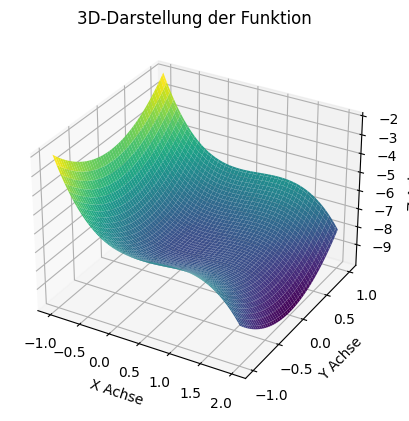

In [ ]:


# Definiere die Funktion
def f(x, y):
    return -x**3 + 2*(x**2 + y**2) - x - 8

x = np.linspace(-1, 2, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_title('3D-Darstellung der Funktion')
ax.set_xlabel('X Achse')
ax.set_ylabel('Y Achse')
ax.set_zlabel('Z Achse')




In [ ]:
plt.show()

Text(0, 0.5, 'Y Achse')

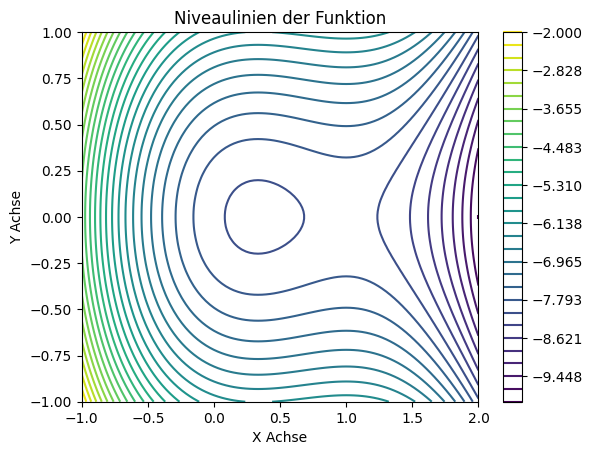

In [ ]:
plt.figure()
cp = plt.contour(x, y, z, levels=np.linspace(z.min(), z.max(), 30), cmap='viridis')
plt.colorbar(cp)
plt.title('Niveaulinien der Funktion')
plt.xlabel('X Achse')
plt.ylabel('Y Achse')



In [ ]:
plt.show()

In [ ]:

# Definiere die Funktion
def f(x, y):
    return -x**3 + 2*(x**2 + y**2) - x - 8

# Erzeuge ein Gitter von x und y Werten
x = np.linspace(-1, 2, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Erstelle eine 3D-Oberfläche
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale='Viridis', name='3D Funktion')])

# Füge Niveaulinien hinzu
contours = go.Contour(z=z, x=x[:, 0], y=y[0, :], colorscale='Viridis', name='Niveaulinien', showscale=False)
fig.add_trace(contours)

# Update Layout für eine klare Darstellung
fig.update_layout(title='3D-Funktion mit 2D-Niveaulinien', autosize=False,
                  width=800, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))

# Zeige die Figur an
fig.show()

In [ ]:
#Ihr Code hier

## 2.4 Adaptive Lernrate und Momentum

$\begin{array}{l}
 \delta \left( t \right) = \lambda  \cdot \frac{{\partial J\left( {\theta \left( {t - 1} \right)} \right)}}{{\partial \theta }} + \mu  \cdot \delta \left( {t - 1} \right) \\
 \theta \left( t \right) = \theta \left( {t - 1} \right) - \delta \left( t \right) \\
 \end{array}$: Gradientenabstieg mit (gewichtetem) Momentum




### Aufgaben



* Gegeben sind Vorschläge, um die Lernrate dynamisch im Zeitverlauf anzupassen. Welche davon sind grundsätzlich diskutabel, welche überhaupt nicht?:
$
\begin{array}{l}
 \lambda \left( t \right) = 2 \cdot \lambda \left( {t - 1} \right) \\
 \lambda \left( t \right) =  - 2 \cdot \lambda \left( {t - 1} \right) \\
 \lambda \left( t \right) = \frac{1}{{2 \cdot \lambda \left( {t - 1} \right)}} \\
 \lambda \left( t \right) = e^{2 \cdot \lambda \left( {t - 1} \right)}  \\
 \lambda \left( t \right) = e^{-2 \cdot \lambda \left( {t - 1} \right)}  \\
 \end{array}
$

* Antwort:
  * bei (-+)2*$\lambda$ wird die Lernrate immer größer, damit wird es schwierig, das Minimum zu finden, da das Ziel ggf. immer wieder übersprungen wird
  * 3 und 5 ist diskutabel
  * e**2 bedeutet dass die Lernrate sich exponential erhöht, was auch nicht zum Ziel führen kann

* Gegeben seien die untenstehende Fehlerfunktion (visualisiert) und die Hyperparameter $\lambda$ (Lernrate) und $\mu$ (Gewichtung des Momentums). Antworten Sie mit $[ja, nein, vielleicht]$:
    * Angenommen man startet in einem flachen Bereich, der kein Minimum ist, und setzt $\lambda >0, \mu=0$, wird der Gradientenabstieg in einem Minimum terminieren? nein
    * Angenommen man startet in einem schrägen Bereich und setzt $\lambda >0, \mu=0$, wird der Gradientenabstieg in einem Minimum terminieren? vielleicht
    * Angenommen man startet in einem flachen Bereich, der kein Minimum ist, und setzt $\lambda >0, \mu>0$, wird der Gradientenabstieg in einem Minimum terminieren? nein
    * Angenommen man startet in einem schrägen Bereich und setzt $\lambda >0, \mu>0$, wird der Gradientenabstieg in einem Minimum terminieren? vielleicht



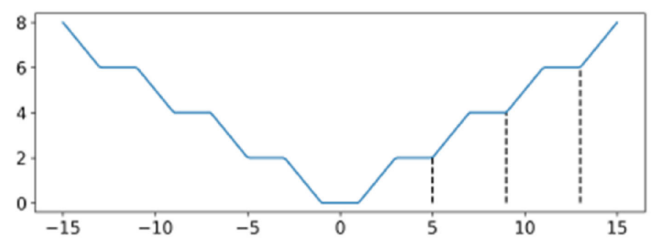
